<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Fundamentos de Aprendizado de Máquina
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Teoria;</li>
  <li>Atributos categóricos;</li>
  <li>Atributos numéricos;</li>
  <li>Dados faltantes.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é preparar a base de dados para prever a espécie do penguin (variável resposta) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = sns.load_dataset('penguins')

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


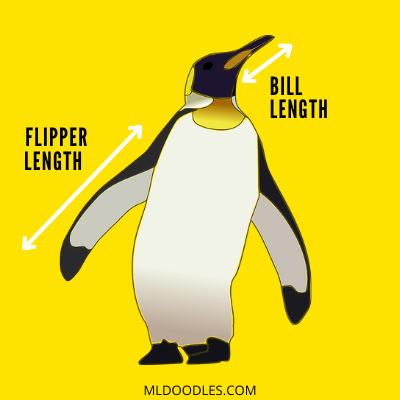

### **1.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [4]:
# resposta da questão 1.1

# verificar os elementos faltantes:
display(data.isnull().sum())

# Eliminando os elementos faltantes:
data.dropna(inplace=True)

# confirmando se os elementos faltantes foi eliminados:
display(data.isnull().sum())



species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### **1.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [5]:
# resposta da questão 1.2

# Loop para padronizar os valores das variáveis numéricas:
for c in data.columns:
  # Indentifica se a coluna é do tipo float:
  if data[c].dtypes == float:
    media = data[c].mean()
    desvio_padrao = data[c].std()
    data[f'{c}_std'] = data[c].apply(lambda medida : (medida - media)/desvio_padrao)


### **1.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [6]:
# resposta da questão 1.3

# OBS: As variáveis: "island" e "sex" são do tipo nominais, pois não 
# é possível atribuir relação de ordem.

which_island = data['island'].unique() #array com o nome das ilhas

for i in which_island:
  data[f'is_island_{i}_nom'] = data['island'].apply(lambda island: 1 if island == i else 0)

data['sex_m_nom'] = data['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
data['sex_f_nom'] = data['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)

### **1.4. Limpeza** 

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [7]:
# resposta da questão 1.4

# Eliminando as colunas:
data.drop(['island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'], axis=1, inplace=True)

# Organizandno o DataFrame:
data = data[['species','is_island_Torgersen_nom', 'is_island_Biscoe_nom', 'is_island_Dream_nom', 'bill_length_mm_std','bill_depth_mm_std', 'flipper_length_mm_std', 'body_mass_g_std', 'sex_m_nom','sex_f_nom']]

data.head() #exibindo o dataframe.

,species,is_island_Torgersen_nom,is_island_Biscoe_nom,is_island_Dream_nom,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_m_nom,sex_f_nom
0,Adelie,1,0,0,-0.894695,0.779559,-1.424608,-0.567621,1,0
1,Adelie,1,0,0,-0.821552,0.119404,-1.067867,-0.505525,0,1
2,Adelie,1,0,0,-0.675264,0.424091,-0.425733,-1.188572,0,1
4,Adelie,1,0,0,-1.333559,1.084246,-0.568429,-0.940192,0,1
5,Adelie,1,0,0,-0.858123,1.744400,-0.782474,-0.691811,1,0


---

In [8]:
# Identificando as espécies:
data['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

##**Imagem das espécieis**
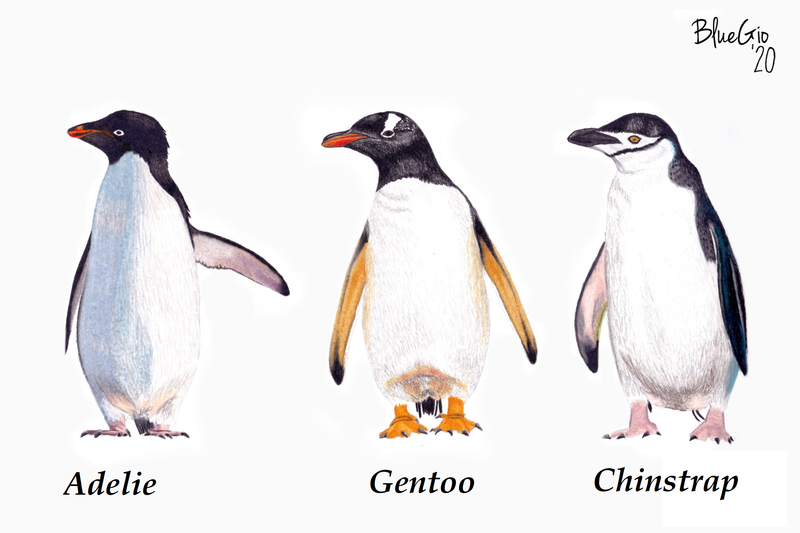